In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flood.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 58958 non-null  float64
 1   TopographyDrainage               58995 non-null  float64
 2   RiverManagement                  58986 non-null  float64
 3   Deforestation                    58989 non-null  float64
 4   Urbanization                     58993 non-null  float64
 5   ClimateChange                    58983 non-null  float64
 6   DamsQuality                      59034 non-null  float64
 7   Siltation                        59006 non-null  float64
 8   AgriculturalPractices            58991 non-null  float64
 9   Encroachments                    59063 non-null  float64
 10  IneffectiveDisasterPreparedness  58985 non-null  float64
 11  DrainageSystems                  59009 non-null  float64
 12  CoastalVulnerabili

In [3]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,2.0,3.0,2.0,5.0,4.0,4.0,9.0,7.0,3.0,3.0,...,4.0,7.0,4.0,3.0,5.0,7.0,4.0,6.0,12.0,0.495
1,5.0,NaN,7.0,4.0,9.0,5.0,3.0,NaN,3.0,7.0,...,5.0,6.0,8.0,48.0,8.0,2.0,2.0,NaN,5.0,0.500
2,10.0,4.0,6.0,4.0,12.0,5.0,3.0,4.0,4.0,8.0,...,6.0,5.0,2.0,3.0,4.0,5.0,5.0,7.0,7.0,0.550
3,8.0,2.0,1.0,1.0,4.0,4.0,6.0,3.0,8.0,5.0,...,5.0,3.0,10.0,7.0,1.0,7.0,3.0,6.0,1.0,0.450
4,1.0,3.0,7.0,1.0,6.0,1.0,4.0,4.0,2.0,8.0,...,4.0,4.0,8.0,4.0,4.0,6.0,6.0,3.0,4.0,0.415


In [4]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [5]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,58958.000000,58995.000000,58986.000000,58989.000000,58993.000000,58983.000000,59034.000000,59006.000000,58991.000000,59063.000000,...,59009.000000,58997.000000,58964.000000,59079.000000,59031.000000,59004.000000,59054.000000,58987.000000,58965.000000,59018.000000
mean,5.267648,5.222307,5.292798,5.273119,5.254505,5.260329,5.277416,5.240230,5.258361,5.252662,...,5.258079,5.254013,5.258429,5.246619,5.267690,5.237035,5.269313,5.244698,5.233511,0.527028
std,4.097793,3.903672,4.174652,4.100431,4.050591,4.117398,4.080541,3.938007,4.035911,3.974438,...,4.004253,3.965047,4.124222,4.131441,4.189906,3.994303,3.984107,3.916689,3.884234,0.314995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.535000
max,104.000000,96.000000,112.000000,112.000000,104.000000,104.000000,112.000000,88.000000,104.000000,120.000000,...,96.000000,104.000000,96.000000,120.000000,104.000000,96.000000,88.000000,104.000000,88.000000,5.080000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 58958 non-null  float64
 1   TopographyDrainage               58995 non-null  float64
 2   RiverManagement                  58986 non-null  float64
 3   Deforestation                    58989 non-null  float64
 4   Urbanization                     58993 non-null  float64
 5   ClimateChange                    58983 non-null  float64
 6   DamsQuality                      59034 non-null  float64
 7   Siltation                        59006 non-null  float64
 8   AgriculturalPractices            58991 non-null  float64
 9   Encroachments                    59063 non-null  float64
 10  IneffectiveDisasterPreparedness  58985 non-null  float64
 11  DrainageSystems                  59009 non-null  float64
 12  CoastalVulnerabili

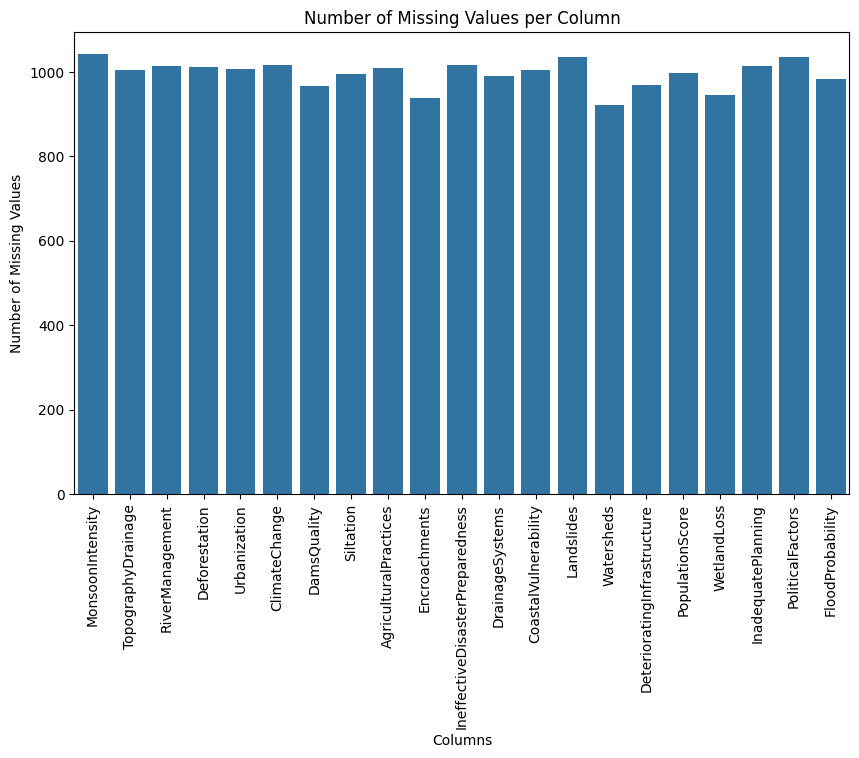

In [7]:
# Number of Missing Values per Column

missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Number of Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()

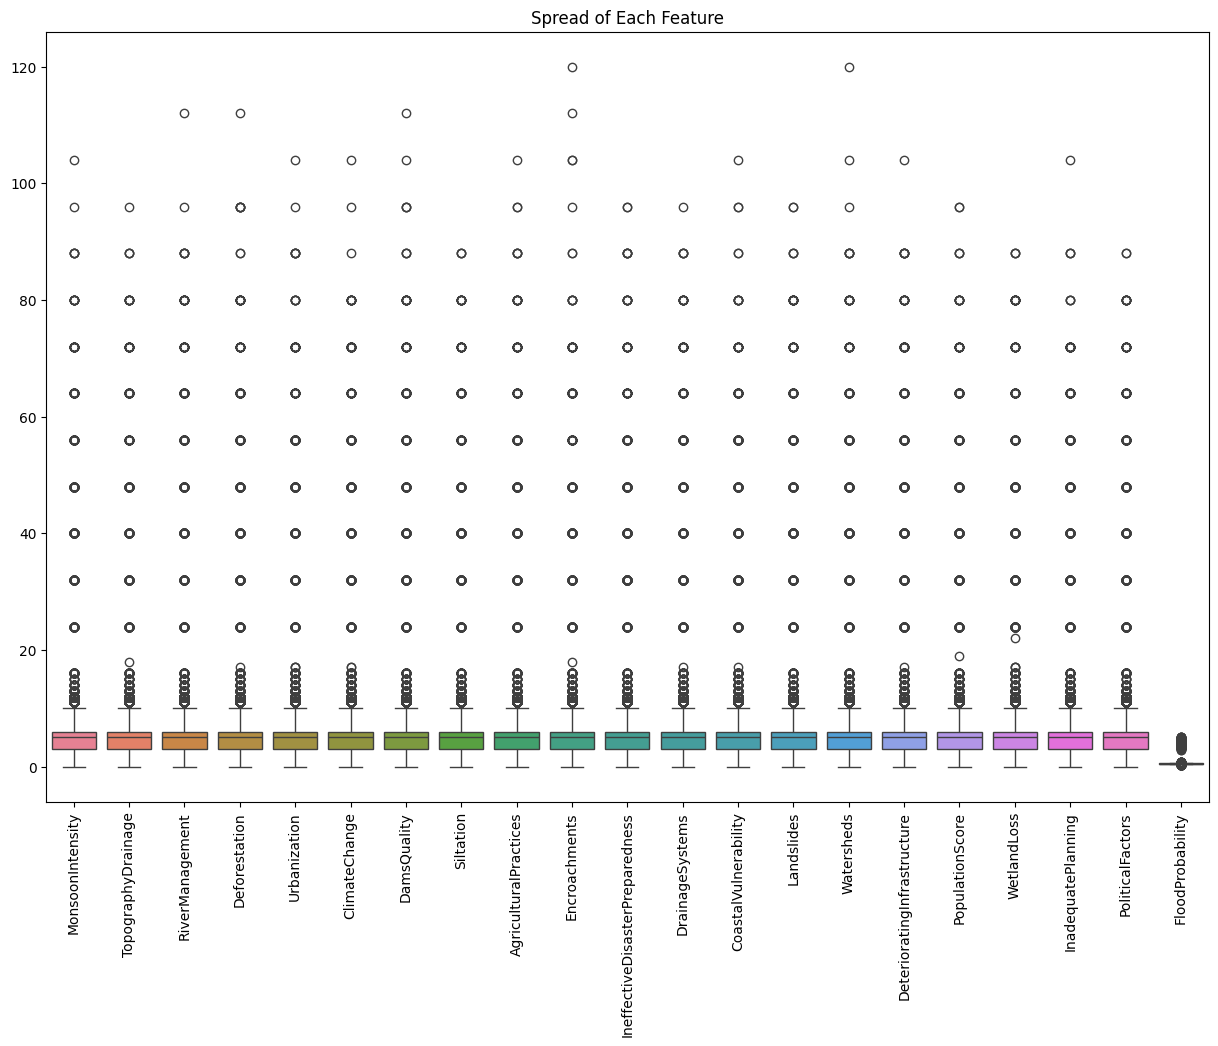

In [8]:
# Spread of Each Feature using Boxplot

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Spread of Each Feature')
plt.show()

In [9]:
# Handling the NULL values

df_cleaned_median = df.fillna(df.median())   # filling the null values with median value
df_cleaned_mean = df.fillna(df.mean())   # filling the null values with mean value
df_cleaned_dropna = df.dropna()  # dropping null values

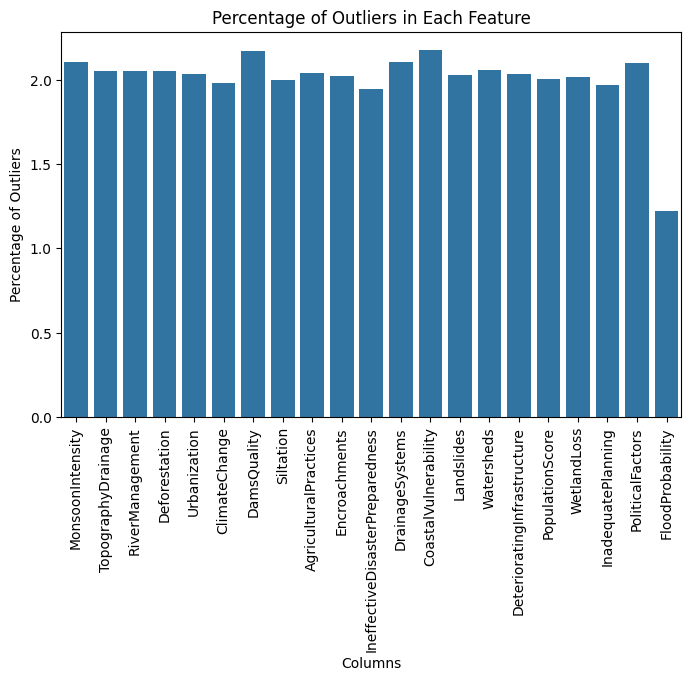

In [10]:
# Percentage of Outliers in Each Column

def count_outliers(df):
    Q1 = df_cleaned_median.quantile(0.25)
    Q3 = df_cleaned_median.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_cleaned_median < (Q1 - 1.5 * IQR)) | (df_cleaned_median > (Q3 + 1.5 * IQR)))
    return outliers.sum()/len(outliers) * 100

outliers_count = count_outliers(df_cleaned_median)

plt.figure(figsize=(8, 5))
sns.barplot(x=outliers_count.index, y=outliers_count.values)
plt.xticks(rotation=90)
plt.title('Percentage of Outliers in Each Feature')
plt.ylabel('Percentage of Outliers')
plt.xlabel('Columns')
plt.show()

In [11]:
# Removing the Outliers

Q1 = df_cleaned_median.quantile(0.25)
Q3 = df_cleaned_median.quantile(0.75)
IQR = Q3 - Q1

df_cleaned_median = df_cleaned_median[~((df_cleaned_median < (Q1 - 1.5 * IQR)) | (df_cleaned_median > (Q3 + 1.5 * IQR))).any(axis=1)]

Q1 = df_cleaned_mean.quantile(0.25)
Q3 = df_cleaned_mean.quantile(0.75)
IQR = Q3 - Q1

df_cleaned_mean = df_cleaned_mean[~((df_cleaned_mean < (Q1 - 1.5 * IQR)) | (df_cleaned_mean > (Q3 + 1.5 * IQR))).any(axis=1)]


Q1 = df_cleaned_dropna.quantile(0.25)
Q3 = df_cleaned_dropna.quantile(0.75)
IQR = Q3 - Q1

df_cleaned_dropna = df_cleaned_dropna[~((df_cleaned_dropna < (Q1 - 1.5 * IQR)) | (df_cleaned_dropna > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
df_cleaned_median.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
3,8.0,2.0,1.0,1.0,4.0,4.0,6.0,3.0,8.0,5.0,...,5.0,3.0,10.0,7.0,1.0,7.0,3.0,6.0,1.0,0.450
4,1.0,3.0,7.0,1.0,6.0,1.0,4.0,4.0,2.0,8.0,...,4.0,4.0,8.0,4.0,4.0,6.0,6.0,3.0,4.0,0.415
5,7.0,4.0,2.0,6.0,6.0,6.0,8.0,2.0,7.0,3.0,...,2.0,7.0,6.0,4.0,2.0,9.0,2.0,2.0,2.0,0.460
6,3.0,1.0,0.0,5.0,4.0,0.0,6.0,2.0,5.0,4.0,...,4.0,7.0,6.0,5.0,6.0,7.0,8.0,4.0,8.0,0.430
8,7.0,9.0,9.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,...,7.0,1.0,6.0,3.0,4.0,4.0,5.0,4.0,9.0,0.500


In [13]:
df_cleaned_median.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40845 entries, 3 to 59997
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 40845 non-null  float64
 1   TopographyDrainage               40845 non-null  float64
 2   RiverManagement                  40845 non-null  float64
 3   Deforestation                    40845 non-null  float64
 4   Urbanization                     40845 non-null  float64
 5   ClimateChange                    40845 non-null  float64
 6   DamsQuality                      40845 non-null  float64
 7   Siltation                        40845 non-null  float64
 8   AgriculturalPractices            40845 non-null  float64
 9   Encroachments                    40845 non-null  float64
 10  IneffectiveDisasterPreparedness  40845 non-null  float64
 11  DrainageSystems                  40845 non-null  float64
 12  CoastalVulnerability   

In [14]:
df_cleaned_mean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40845 entries, 3 to 59997
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 40845 non-null  float64
 1   TopographyDrainage               40845 non-null  float64
 2   RiverManagement                  40845 non-null  float64
 3   Deforestation                    40845 non-null  float64
 4   Urbanization                     40845 non-null  float64
 5   ClimateChange                    40845 non-null  float64
 6   DamsQuality                      40845 non-null  float64
 7   Siltation                        40845 non-null  float64
 8   AgriculturalPractices            40845 non-null  float64
 9   Encroachments                    40845 non-null  float64
 10  IneffectiveDisasterPreparedness  40845 non-null  float64
 11  DrainageSystems                  40845 non-null  float64
 12  CoastalVulnerability   

In [15]:
df_cleaned_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38086 entries, 3 to 59997
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 38086 non-null  float64
 1   TopographyDrainage               38086 non-null  float64
 2   RiverManagement                  38086 non-null  float64
 3   Deforestation                    38086 non-null  float64
 4   Urbanization                     38086 non-null  float64
 5   ClimateChange                    38086 non-null  float64
 6   DamsQuality                      38086 non-null  float64
 7   Siltation                        38086 non-null  float64
 8   AgriculturalPractices            38086 non-null  float64
 9   Encroachments                    38086 non-null  float64
 10  IneffectiveDisasterPreparedness  38086 non-null  float64
 11  DrainageSystems                  38086 non-null  float64
 12  CoastalVulnerability   

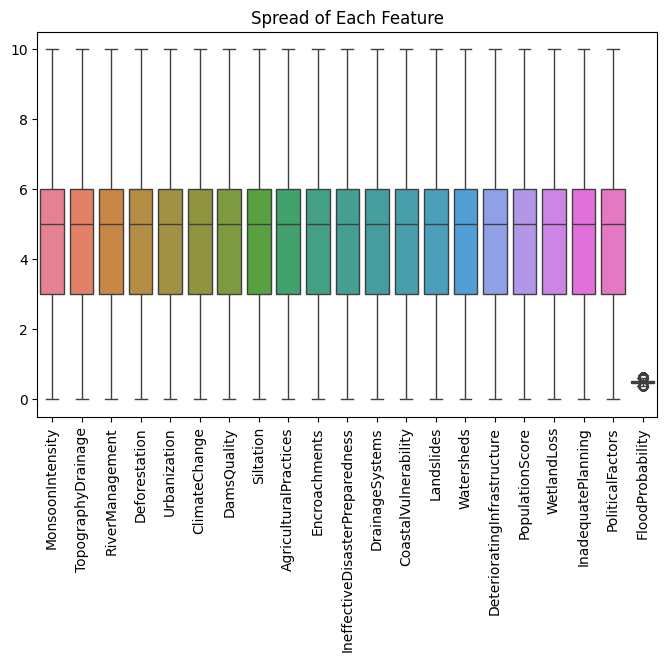

In [16]:
# Spread of Each Feature after Data Cleaning

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_cleaned_median)
plt.xticks(rotation=90)
plt.title('Spread of Each Feature')
plt.show()

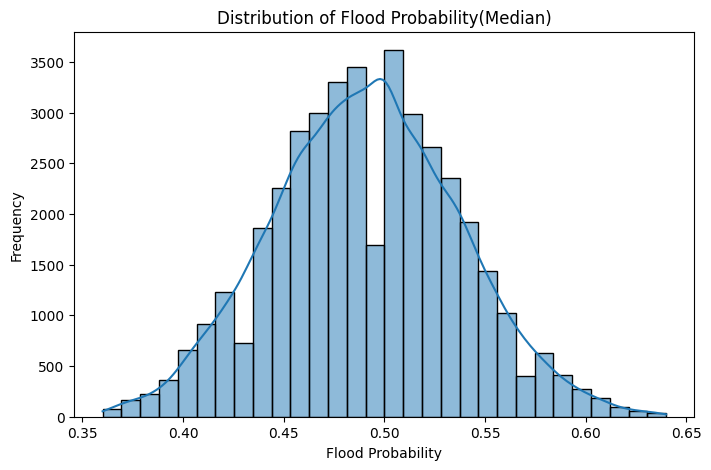

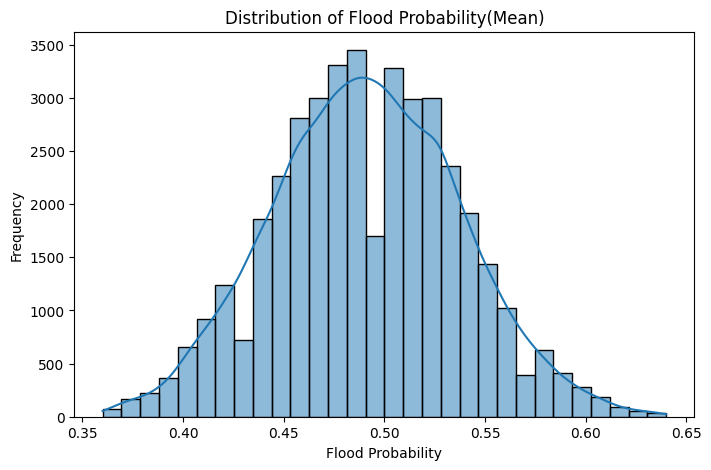

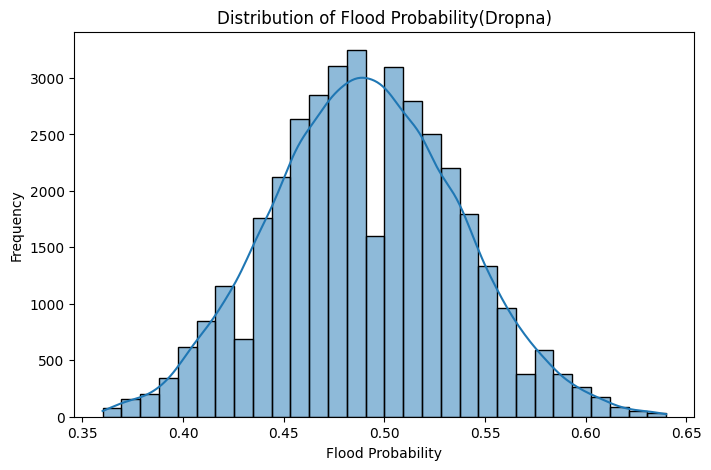

In [17]:
# Distribution of Flood Probablity

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned_median['FloodProbability'], kde=True, bins=30)
plt.title('Distribution of Flood Probability(Median)')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned_mean['FloodProbability'], kde=True, bins=30)
plt.title('Distribution of Flood Probability(Mean)')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned_dropna['FloodProbability'], kde=True, bins=30)
plt.title('Distribution of Flood Probability(Dropna)')
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

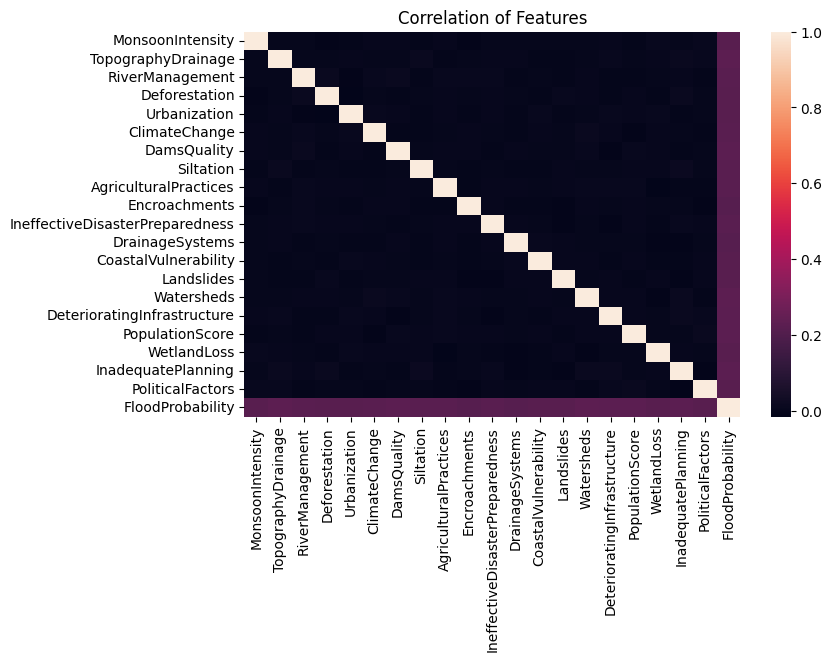

In [18]:
# Correlation of Features using a Heatmap

plt.figure(figsize=(8, 5))
sns.heatmap(df_cleaned_median.corr())
plt.title('Correlation of Features')
plt.show()

In [19]:
# Splitting data into features (X) and target (y)
X_med = df_cleaned_median.drop(columns=['MonsoonIntensity'])
y_med = df_cleaned_median['MonsoonIntensity']

X_mea = df_cleaned_mean.drop(columns=['MonsoonIntensity'])
y_mea = df_cleaned_mean['MonsoonIntensity']

X_drp = df_cleaned_dropna.drop(columns=['MonsoonIntensity'])
y_drp = df_cleaned_dropna['MonsoonIntensity']

In [20]:
from sklearn.model_selection import train_test_split
X_train_med, X_test_med, y_train_med, y_test_med = train_test_split(X_med, y_med, test_size=0.2, random_state=42)
X_train_mea, X_test_mea, y_train_mea, y_test_mea = train_test_split(X_mea, y_mea, test_size=0.2, random_state=42)
X_train_drp, X_test_drp, y_train_drp, y_test_drp = train_test_split(X_drp, y_drp, test_size=0.2, random_state=42)


With Median Values

In [ ]:
# AdaBoost Regressor
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train_med, y_train_med)
predictions_ada = ada_model.predict(X_test_med)

In [22]:
# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_med, y_train_med)
predictions_xgb = xgb_model.predict(X_test_med)

In [23]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_med, y_train_med)
predictions_svr = svr_model.predict(X_test_med)

In [24]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_med, y_train_med)
predictions_linear = linear_reg.predict(X_test_med)

In [25]:
# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_med, y_train_med)
predictions_rf = rf_model.predict(X_test_med)

In [26]:
# Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train_med)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_med)
X_test_poly = polynomial_features.transform(X_test_med)
predictions_poly = poly_reg.predict(X_test_poly)

In [27]:
#Ensemble Predictions (Average of all model predictions)
ensemble_preds = (predictions_ada + predictions_xgb + predictions_svr + predictions_rf + predictions_linear + predictions_poly) / 6


In [28]:
#Performance Metrics for Each Model
def display_metrics(y_test, predictions, model_name):
    print(f"{model_name} Performance Metrics:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
    print("R-squared (R²):", r2_score(y_test, predictions))
    print("\n")

In [29]:
# Display metrics for each model
display_metrics(y_test_med, predictions_ada, "AdaBoost")
display_metrics(y_test_med, predictions_xgb, "XGBoost")
display_metrics(y_test_med, predictions_svr, "SVR")
display_metrics(y_test_med, predictions_rf, "Random Forest")
display_metrics(y_test_med, predictions_linear, "Linear Regression")
display_metrics(y_test_med, predictions_poly, "Polynomial Regression")
display_metrics(y_test_med, ensemble_preds, "Ensemble")

AdaBoost Performance Metrics:
Mean Absolute Error (MAE): 1.6729268718971797
Mean Squared Error (MSE): 4.297777829844027
Root Mean Squared Error (RMSE): 2.073108253286361
R-squared (R²): 0.049488390877768795


XGBoost Performance Metrics:
Mean Absolute Error (MAE): 1.386466046995217
Mean Squared Error (MSE): 2.9916841676272727
Root Mean Squared Error (RMSE): 1.7296485676654876
R-squared (R²): 0.33834864324289615


SVR Performance Metrics:
Mean Absolute Error (MAE): 1.718152332084936
Mean Squared Error (MSE): 4.578671108863075
Root Mean Squared Error (RMSE): 2.139782958354205
R-squared (R²): -0.012634951277799233


Random Forest Performance Metrics:
Mean Absolute Error (MAE): 1.521065230633813
Mean Squared Error (MSE): 3.6244811354178728
Root Mean Squared Error (RMSE): 1.9038070110748813
R-squared (R²): 0.19839704781011402


Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 0.5873349003273636
Mean Squared Error (MSE): 1.124722949837174
Root Mean Squared Error (RMSE): 1.06

In [30]:
#Summary Table of Results
results = {
    "Model": ["AdaBoost", "XGBoost", "SVR", "Random Forest", "Linear Regression", "Polynomial Regression", "Ensemble"],
    "MAE": [
        mean_absolute_error(y_test_med, predictions_ada),
        mean_absolute_error(y_test_med, predictions_xgb),
        mean_absolute_error(y_test_med, predictions_svr),
        mean_absolute_error(y_test_med, predictions_rf),
        mean_absolute_error(y_test_med, predictions_linear),
        mean_absolute_error(y_test_med, predictions_poly),
        mean_absolute_error(y_test_med, ensemble_preds)
    ],
    "MSE": [
        mean_squared_error(y_test_med, predictions_ada),
        mean_squared_error(y_test_med, predictions_xgb),
        mean_squared_error(y_test_med, predictions_svr),
        mean_squared_error(y_test_med, predictions_rf),
        mean_squared_error(y_test_med, predictions_linear),
        mean_squared_error(y_test_med, predictions_poly),
        mean_squared_error(y_test_med, ensemble_preds)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test_med, predictions_ada)),
        np.sqrt(mean_squared_error(y_test_med, predictions_xgb)),
        np.sqrt(mean_squared_error(y_test_med, predictions_svr)),
        np.sqrt(mean_squared_error(y_test_med, predictions_rf)),
        np.sqrt(mean_squared_error(y_test_med, predictions_linear)),
        np.sqrt(mean_squared_error(y_test_med, predictions_poly)),
        np.sqrt(mean_squared_error(y_test_med, ensemble_preds))
    ],
    "R2": [
        r2_score(y_test_med, predictions_ada),
        r2_score(y_test_med, predictions_xgb),
        r2_score(y_test_med, predictions_svr),
        r2_score(y_test_med, predictions_rf),
        r2_score(y_test_med, predictions_linear),
        r2_score(y_test_med, predictions_poly),
        r2_score(y_test_med, ensemble_preds)
    ]
}

# Display the summary table
results_df = pd.DataFrame(results)
results_df

,Model,MAE,MSE,RMSE,R2
0,AdaBoost,1.672927,4.297778,2.073108,0.049488
1,XGBoost,1.386466,2.991684,1.729649,0.338349
2,SVR,1.718152,4.578671,2.139783,-0.012635
3,Random Forest,1.521065,3.624481,1.903807,0.198397
4,Linear Regression,0.587335,1.124723,1.060530,0.751252
5,Polynomial Regression,0.575732,1.181486,1.086962,0.738698
6,Ensemble,1.202754,2.260141,1.503376,0.500139


With Mean Values

In [31]:
# AdaBoost Regressor
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train_mea, y_train_mea)
predictions_ada = ada_model.predict(X_test_mea)

# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_mea, y_train_mea)
predictions_xgb = xgb_model.predict(X_test_mea)

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_mea, y_train_mea)
predictions_svr = svr_model.predict(X_test_mea)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_mea, y_train_mea)
predictions_linear = linear_reg.predict(X_test_mea)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_mea, y_train_mea)
predictions_rf = rf_model.predict(X_test_mea)

# Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train_mea)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_mea)
X_test_poly = polynomial_features.transform(X_test_mea)
predictions_poly = poly_reg.predict(X_test_poly)

#Ensemble Predictions (Average of all model predictions)
ensemble_preds = (predictions_ada + predictions_xgb + predictions_svr + predictions_rf + predictions_linear + predictions_poly) / 6

#Performance Metrics for Each Model
def display_metrics(y_test, predictions, model_name):
    print(f"{model_name} Performance Metrics:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
    print("R-squared (R²):", r2_score(y_test, predictions))
    print("\n")

# Display metrics for each model
display_metrics(y_test_mea, predictions_ada, "AdaBoost")
display_metrics(y_test_mea, predictions_xgb, "XGBoost")
display_metrics(y_test_mea, predictions_svr, "SVR")
display_metrics(y_test_mea, predictions_rf, "Random Forest")
display_metrics(y_test_mea, predictions_linear, "Linear Regression")
display_metrics(y_test_mea, predictions_poly, "Polynomial Regression")
display_metrics(y_test_mea, ensemble_preds, "Ensemble")

#Summary Table of Results
results = {
    "Model": ["AdaBoost", "XGBoost", "SVR", "Random Forest", "Linear Regression", "Polynomial Regression", "Ensemble"],
    "MAE": [
        mean_absolute_error(y_test_mea, predictions_ada),
        mean_absolute_error(y_test_mea, predictions_xgb),
        mean_absolute_error(y_test_mea, predictions_svr),
        mean_absolute_error(y_test_mea, predictions_rf),
        mean_absolute_error(y_test_mea, predictions_linear),
        mean_absolute_error(y_test_mea, predictions_poly),
        mean_absolute_error(y_test_mea, ensemble_preds)
    ],
    "MSE": [
        mean_squared_error(y_test_mea, predictions_ada),
        mean_squared_error(y_test_mea, predictions_xgb),
        mean_squared_error(y_test_mea, predictions_svr),
        mean_squared_error(y_test_mea, predictions_rf),
        mean_squared_error(y_test_mea, predictions_linear),
        mean_squared_error(y_test_mea, predictions_poly),
        mean_squared_error(y_test_mea, ensemble_preds)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test_mea, predictions_ada)),
        np.sqrt(mean_squared_error(y_test_mea, predictions_xgb)),
        np.sqrt(mean_squared_error(y_test_mea, predictions_svr)),
        np.sqrt(mean_squared_error(y_test_mea, predictions_rf)),
        np.sqrt(mean_squared_error(y_test_mea, predictions_linear)),
        np.sqrt(mean_squared_error(y_test_mea, predictions_poly)),
        np.sqrt(mean_squared_error(y_test_mea, ensemble_preds))
    ],
    "R2": [
        r2_score(y_test_mea, predictions_ada),
        r2_score(y_test_mea, predictions_xgb),
        r2_score(y_test_mea, predictions_svr),
        r2_score(y_test_mea, predictions_rf),
        r2_score(y_test_mea, predictions_linear),
        r2_score(y_test_mea, predictions_poly),
        r2_score(y_test_mea, ensemble_preds)
    ]
}

# Display the summary table
results_df = pd.DataFrame(results)
results_df

AdaBoost Performance Metrics:
Mean Absolute Error (MAE): 1.6741771175713256
Mean Squared Error (MSE): 4.296637267218516
Root Mean Squared Error (RMSE): 2.07283314987447
R-squared (R²): 0.04990988303537758


XGBoost Performance Metrics:
Mean Absolute Error (MAE): 1.3927482931875015
Mean Squared Error (MSE): 3.0021992443739824
Root Mean Squared Error (RMSE): 1.732685558424835
R-squared (R²): 0.3361413463964833


SVR Performance Metrics:
Mean Absolute Error (MAE): 1.7190300199773567
Mean Squared Error (MSE): 4.578176187944554
Root Mean Squared Error (RMSE): 2.1396673077711297
R-squared (R²): -0.012345161895575218


Random Forest Performance Metrics:
Mean Absolute Error (MAE): 1.5263517043695756
Mean Squared Error (MSE): 3.64988604568827
Root Mean Squared Error (RMSE): 1.9104674940150828
R-squared (R²): 0.1929221750896405


Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 0.6823664280484559
Mean Squared Error (MSE): 1.3464563914186445
Root Mean Squared Error (RMSE): 1.1603

,Model,MAE,MSE,RMSE,R2
0,AdaBoost,1.674177,4.296637,2.072833,0.049910
1,XGBoost,1.392748,3.002199,1.732686,0.336141
2,SVR,1.719030,4.578176,2.139667,-0.012345
3,Random Forest,1.526352,3.649886,1.910467,0.192922
4,Linear Regression,0.682366,1.346456,1.160369,0.702266
5,Polynomial Regression,0.605875,1.284714,1.133452,0.715919
6,Ensemble,1.223355,2.336432,1.528539,0.483359


With Dropped Values

In [32]:
# AdaBoost Regressor
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train_drp, y_train_drp)
predictions_ada = ada_model.predict(X_test_drp)

# XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_drp, y_train_drp)
predictions_xgb = xgb_model.predict(X_test_drp)

# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train_drp, y_train_drp)
predictions_svr = svr_model.predict(X_test_drp)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_drp, y_train_drp)
predictions_linear = linear_reg.predict(X_test_drp)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_drp, y_train_drp)
predictions_rf = rf_model.predict(X_test_drp)

# Polynomial Regression
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train_drp)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train_drp)
X_test_poly = polynomial_features.transform(X_test_drp)
predictions_poly = poly_reg.predict(X_test_poly)

#Ensemble Predictions (Average of all model predictions)
ensemble_preds = (predictions_ada + predictions_xgb + predictions_svr + predictions_rf + predictions_linear + predictions_poly) / 6

#Performance Metrics for Each Model
def display_metrics(y_test, predictions, model_name):
    print(f"{model_name} Performance Metrics:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
    print("R-squared (R²):", r2_score(y_test, predictions))
    print("\n")

# Display metrics for each model
display_metrics(y_test_drp, predictions_ada, "AdaBoost")
display_metrics(y_test_drp, predictions_xgb, "XGBoost")
display_metrics(y_test_drp, predictions_svr, "SVR")
display_metrics(y_test_drp, predictions_rf, "Random Forest")
display_metrics(y_test_drp, predictions_linear, "Linear Regression")
display_metrics(y_test_drp, predictions_poly, "Polynomial Regression")
display_metrics(y_test_drp, ensemble_preds, "Ensemble")

#Summary Table of Results
results = {
    "Model": ["AdaBoost", "XGBoost", "SVR", "Random Forest", "Linear Regression", "Polynomial Regression", "Ensemble"],
    "MAE": [
        mean_absolute_error(y_test_drp, predictions_ada),
        mean_absolute_error(y_test_drp, predictions_xgb),
        mean_absolute_error(y_test_drp, predictions_svr),
        mean_absolute_error(y_test_drp, predictions_rf),
        mean_absolute_error(y_test_drp, predictions_linear),
        mean_absolute_error(y_test_drp, predictions_poly),
        mean_absolute_error(y_test_drp, ensemble_preds)
    ],
    "MSE": [
        mean_squared_error(y_test_drp, predictions_ada),
        mean_squared_error(y_test_drp, predictions_xgb),
        mean_squared_error(y_test_drp, predictions_svr),
        mean_squared_error(y_test_drp, predictions_rf),
        mean_squared_error(y_test_drp, predictions_linear),
        mean_squared_error(y_test_drp, predictions_poly),
        mean_squared_error(y_test_drp, ensemble_preds)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test_drp, predictions_ada)),
        np.sqrt(mean_squared_error(y_test_drp, predictions_xgb)),
        np.sqrt(mean_squared_error(y_test_drp, predictions_svr)),
        np.sqrt(mean_squared_error(y_test_drp, predictions_rf)),
        np.sqrt(mean_squared_error(y_test_drp, predictions_linear)),
        np.sqrt(mean_squared_error(y_test_drp, predictions_poly)),
        np.sqrt(mean_squared_error(y_test_drp, ensemble_preds))
    ],
    "R2": [
        r2_score(y_test_drp, predictions_ada),
        r2_score(y_test_drp, predictions_xgb),
        r2_score(y_test_drp, predictions_svr),
        r2_score(y_test_drp, predictions_rf),
        r2_score(y_test_drp, predictions_linear),
        r2_score(y_test_drp, predictions_poly),
        r2_score(y_test_drp, ensemble_preds)
    ]
}

# Display the summary table
results_df = pd.DataFrame(results)
results_df

AdaBoost Performance Metrics:
Mean Absolute Error (MAE): 1.7062671838017756
Mean Squared Error (MSE): 4.392822535819458
Root Mean Squared Error (RMSE): 2.0959061371682317
R-squared (R²): 0.04098061483339821


XGBoost Performance Metrics:
Mean Absolute Error (MAE): 1.3719486284675357
Mean Squared Error (MSE): 2.9197034328263243
Root Mean Squared Error (RMSE): 1.7087139704544831
R-squared (R²): 0.362584723560752


SVR Performance Metrics:
Mean Absolute Error (MAE): 1.7553288230595716
Mean Squared Error (MSE): 4.666880407403446
Root Mean Squared Error (RMSE): 2.1602963702703954
R-squared (R²): -0.018850350192716858


Random Forest Performance Metrics:
Mean Absolute Error (MAE): 1.589519558939354
Mean Squared Error (MSE): 3.8635716723549485
Root Mean Squared Error (RMSE): 1.9655970269500684
R-squared (R²): 0.1565240572419916


Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 0.009713927942734468
Mean Squared Error (MSE): 0.0065229985596885354
Root Mean Squared Error (RMSE)

,Model,MAE,MSE,RMSE,R2
0,AdaBoost,1.706267,4.392823,2.095906,0.040981
1,XGBoost,1.371949,2.919703,1.708714,0.362585
2,SVR,1.755329,4.666880,2.160296,-0.018850
3,Random Forest,1.589520,3.863572,1.965597,0.156524
4,Linear Regression,0.009714,0.006523,0.080765,0.998576
5,Polynomial Regression,0.023278,0.007363,0.085807,0.998393
6,Ensemble,1.053808,1.685797,1.298382,0.631965
